# **Loan Eligibility Prediction using Decision Tree**

## *Introduction*

In today's fast-paced world, financial institutions like Dream Housing Finance Company are increasingly relying on automation to streamline their processes. One such critical process is determining the eligibility of customers for home loans. Automating this process not only saves time but also ensures consistency and accuracy in decision-making.

### Objective

The primary objective of this project is to build a predictive model that can automatically determine whether a customer is eligible for a home loan based on various parameters provided during the online application process. We will use a Decision Tree algorithm to achieve this. Decision Trees are a popular choice for classification tasks due to their simplicity, interpretability, and ability to handle both numerical and categorical data.

### Parameters

The dataset provided, loan_eligibility.csv, contains several features that will be used to predict the loan eligibility status (Loan_Status). The key parameters include:

    1. Gender: The gender of the applicant (Male/Female).

    2. Marital Status: The marital status of the applicant (Married/Single).

    3. Education: The educational qualification of the applicant (Graduate/Not Graduate).

    4. Number of Dependents: The number of dependents the applicant has.

    5. Income: The income of the applicant.

    6. Loan Amount: The amount of loan requested by the applicant.

    7. Credit History: A record of the applicant's past credit behavior (Good/Bad).

    8. Other Features: Additional features that may influence the loan eligibility decision.

The target variable, Loan_Status, is a binary variable where:

    Y: The applicant is eligible for the loan.

    N: The applicant is not eligible for the loan.

### Approach

   1. Data Preprocessing: We will start by cleaning the data, handling missing values, and encoding categorical variables.

   2. Exploratory Data Analysis (EDA): We will explore the data to understand the distribution of features and their relationship with the target variable.

   3. Feature Engineering: We will create new features or transform existing ones to improve the model's performance.

   4. Model Building: We will build a Decision Tree model using the preprocessed data.

   5. Model Evaluation: We will evaluate the model's performance using metrics such as accuracy, precision, recall, and F1-score.

   6. Model Optimization: We will fine-tune the model by adjusting hyperparameters to achieve the best performance.

   7. Conclusion: Finally, we will summarize the findings and discuss the model's effectiveness in predicting loan eligibility.

## *Data Cleaning*

Before handling any issues in the dataset, it's crucial to detect and analyze them thoroughly. This ensures that we address the problems systematically and make informed decisions during data cleaning. Let's go through the process step by step.

Detect Problems in the Dataset

We will check for the following issues:

    1. Duplicates: Are there any duplicate rows in the dataset?

    2. Missing Values: Are there any missing values in the dataset?

    3. Outliers: Are there any outliers in numerical columns?

    4. Imbalance in Target Variable: Is the target variable (Loan_Status) balanced or imbalanced?

    5. Inconsistent Data: Are there any inconsistencies in categorical or numerical data?

    6. Data Types: Are the data types of columns correct?

### Import Libraries

In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import joblib

### Load the Dataset

In [51]:
df = pd.read_csv('loan_eligibility.csv')

df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


### Check for Duplicates

In [52]:
# Check for duplicate rows
duplicates = df.duplicated().sum()
print("Number of duplicate rows:", duplicates)

Number of duplicate rows: 0


### Check for Missing Values

In [53]:
# Check for missing values in each column
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100
print("Missing values:\n", missing_values)
print("\nPercentage of missing values:\n", missing_percentage)

Missing values:
 Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

Percentage of missing values:
 Loan_ID              0.000000
Gender               2.117264
Married              0.488599
Dependents           2.442997
Education            0.000000
Self_Employed        5.211726
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           3.583062
Loan_Amount_Term     2.280130
Credit_History       8.143322
Property_Area        0.000000
Loan_Status          0.000000
dtype: float64


### Check for Outliers

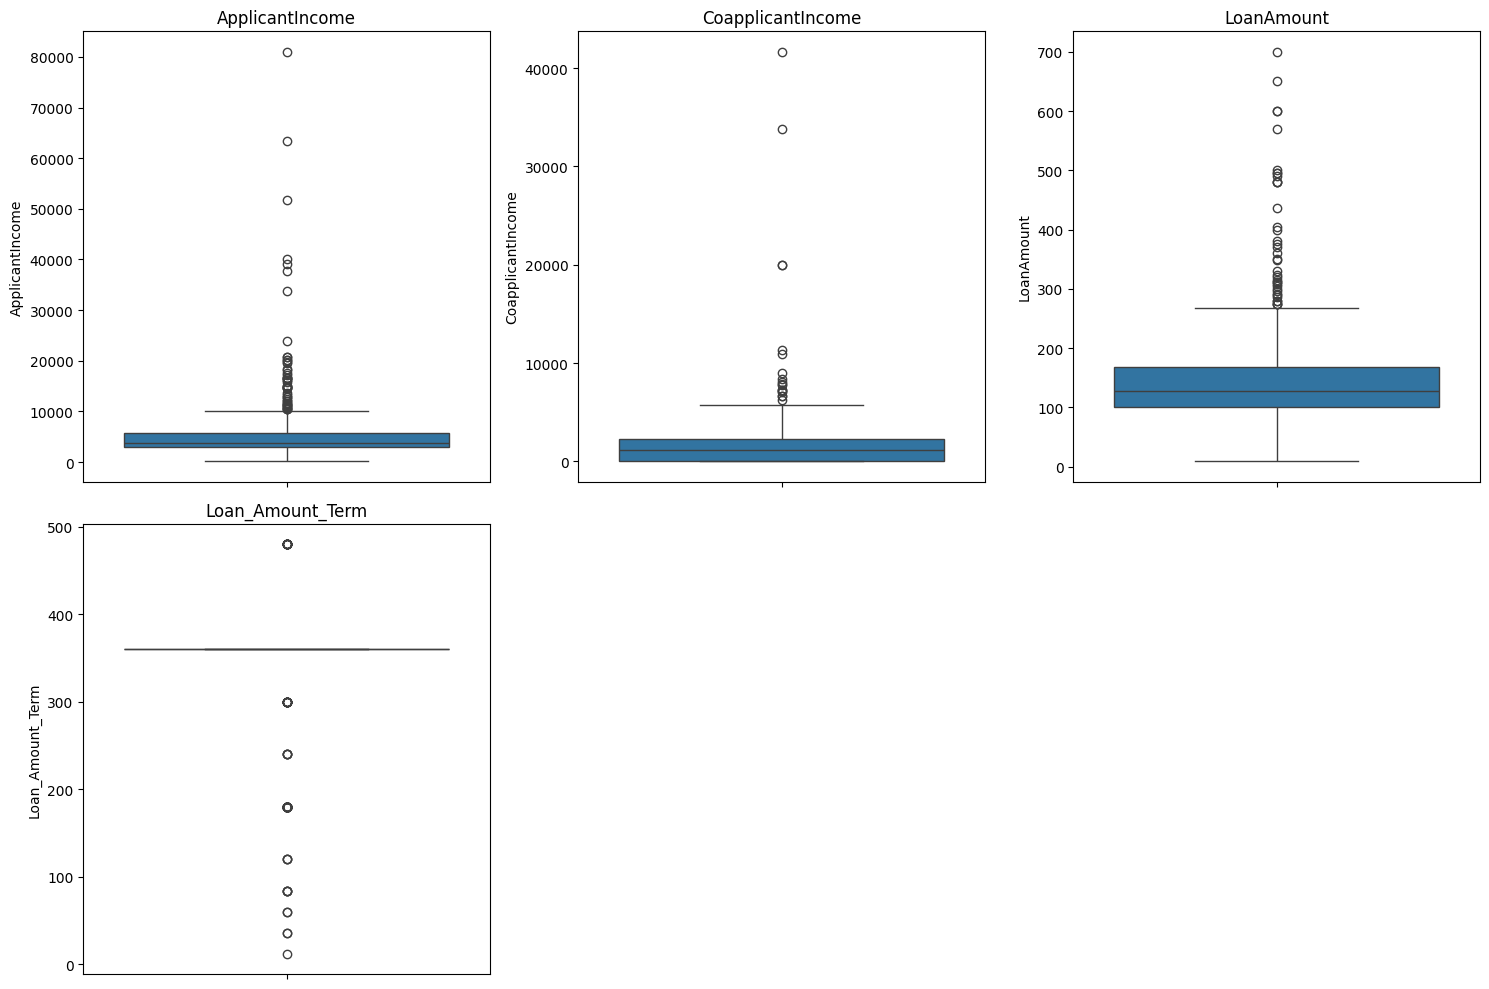

Number of outliers in ApplicantIncome: 50
Number of outliers in CoapplicantIncome: 18
Number of outliers in LoanAmount: 39
Number of outliers in Loan_Amount_Term: 88


In [54]:
# Select numerical columns (excluding 'Credit_History')
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
numerical_columns = numerical_columns.drop('Credit_History')  # Exclude Credit_History

# Plot boxplots for numerical columns to detect outliers
plt.figure(figsize=(15, 10))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(y=df[column])
    plt.title(column)
plt.tight_layout()
plt.show()

# Use IQR to detect outliers
for column in numerical_columns:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    print(f"Number of outliers in {column}: {len(outliers)}")

### Check for Imbalance in Target Variable

Distribution of Loan_Status:
 Loan_Status
Y    68.729642
N    31.270358
Name: proportion, dtype: float64


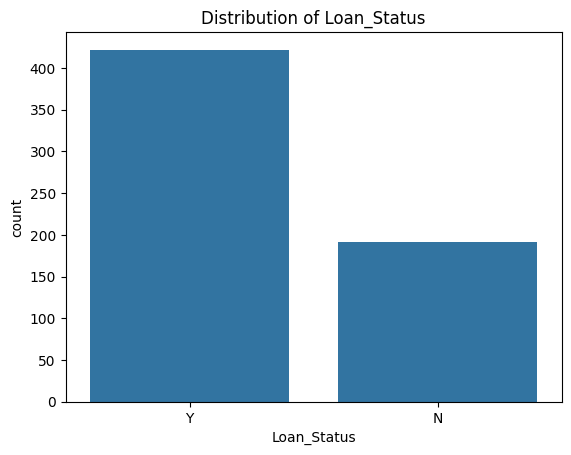

In [55]:
# Check the distribution of the target variable
target_distribution = df['Loan_Status'].value_counts(normalize=True) * 100
print("Distribution of Loan_Status:\n", target_distribution)

# Plot the distribution
sns.countplot(x='Loan_Status', data=df)
plt.title("Distribution of Loan_Status")
plt.show()

### Check for Inconsistent Data

In [56]:
# Select categorical columns (excluding 'Loan_ID')
categorical_columns = df.select_dtypes(include=['object']).columns
categorical_columns = categorical_columns.drop('Loan_ID')

# Check unique values in categorical columns
for column in categorical_columns:
    print(f"Unique values in {column}:\n", df[column].unique())

Unique values in Gender:
 ['Male' 'Female' nan]
Unique values in Married:
 ['No' 'Yes' nan]
Unique values in Dependents:
 ['0' '1' '2' '3+' nan]
Unique values in Education:
 ['Graduate' 'Not Graduate']
Unique values in Self_Employed:
 ['No' 'Yes' nan]
Unique values in Property_Area:
 ['Urban' 'Rural' 'Semiurban']
Unique values in Loan_Status:
 ['Y' 'N']


In [57]:
# Check for negative or unrealistic values in numerical columns
for column in numerical_columns:
    print(f"Minimum value in {column}: {df[column].min()}")
    print(f"Maximum value in {column}: {df[column].max()}\n")

Minimum value in ApplicantIncome: 150
Maximum value in ApplicantIncome: 81000

Minimum value in CoapplicantIncome: 0.0
Maximum value in CoapplicantIncome: 41667.0

Minimum value in LoanAmount: 9.0
Maximum value in LoanAmount: 700.0

Minimum value in Loan_Amount_Term: 12.0
Maximum value in Loan_Amount_Term: 480.0



### Check Data Types

In [58]:
# Check data types of columns
print("Data types:\n", df.dtypes)

Data types:
 Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object


Let’s start cleaning the dataset step by step. The first step is to remove the Loan_ID column, as it is a unique identifier and doesn’t contribute to the predictive model. The final step will be to save the cleaned dataset for further analysis or modeling.


### Remove Loan_ID Column

In [59]:
# Drop the 'Loan_ID' column
df.drop('Loan_ID', axis=1, inplace=True)

# Verify that the column has been removed
print("Columns after removing 'Loan_ID':\n", df.columns)

Columns after removing 'Loan_ID':
 Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')


### Handle Missing Values

In [60]:
# Impute missing values without using inplace=True
df['Gender'] = df['Gender'].fillna(df['Gender'].mode()[0])
df['Married'] = df['Married'].fillna(df['Married'].mode()[0])
df['Dependents'] = df['Dependents'].fillna(df['Dependents'].mode()[0])
df['Self_Employed'] = df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])
df['LoanAmount'] = df['LoanAmount'].fillna(df['LoanAmount'].median())
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0])
df['Credit_History'] = df['Credit_History'].fillna(df['Credit_History'].mode()[0])

### Handle Outliers

In [61]:
# Cap outliers in all numerical columns using IQR
df[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']] = df[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']].apply(
    lambda x: x.clip(x.quantile(0.25) - 1.5 * (x.quantile(0.75) - x.quantile(0.25)), 
                     x.quantile(0.75) + 1.5 * (x.quantile(0.75) - x.quantile(0.25)))
)

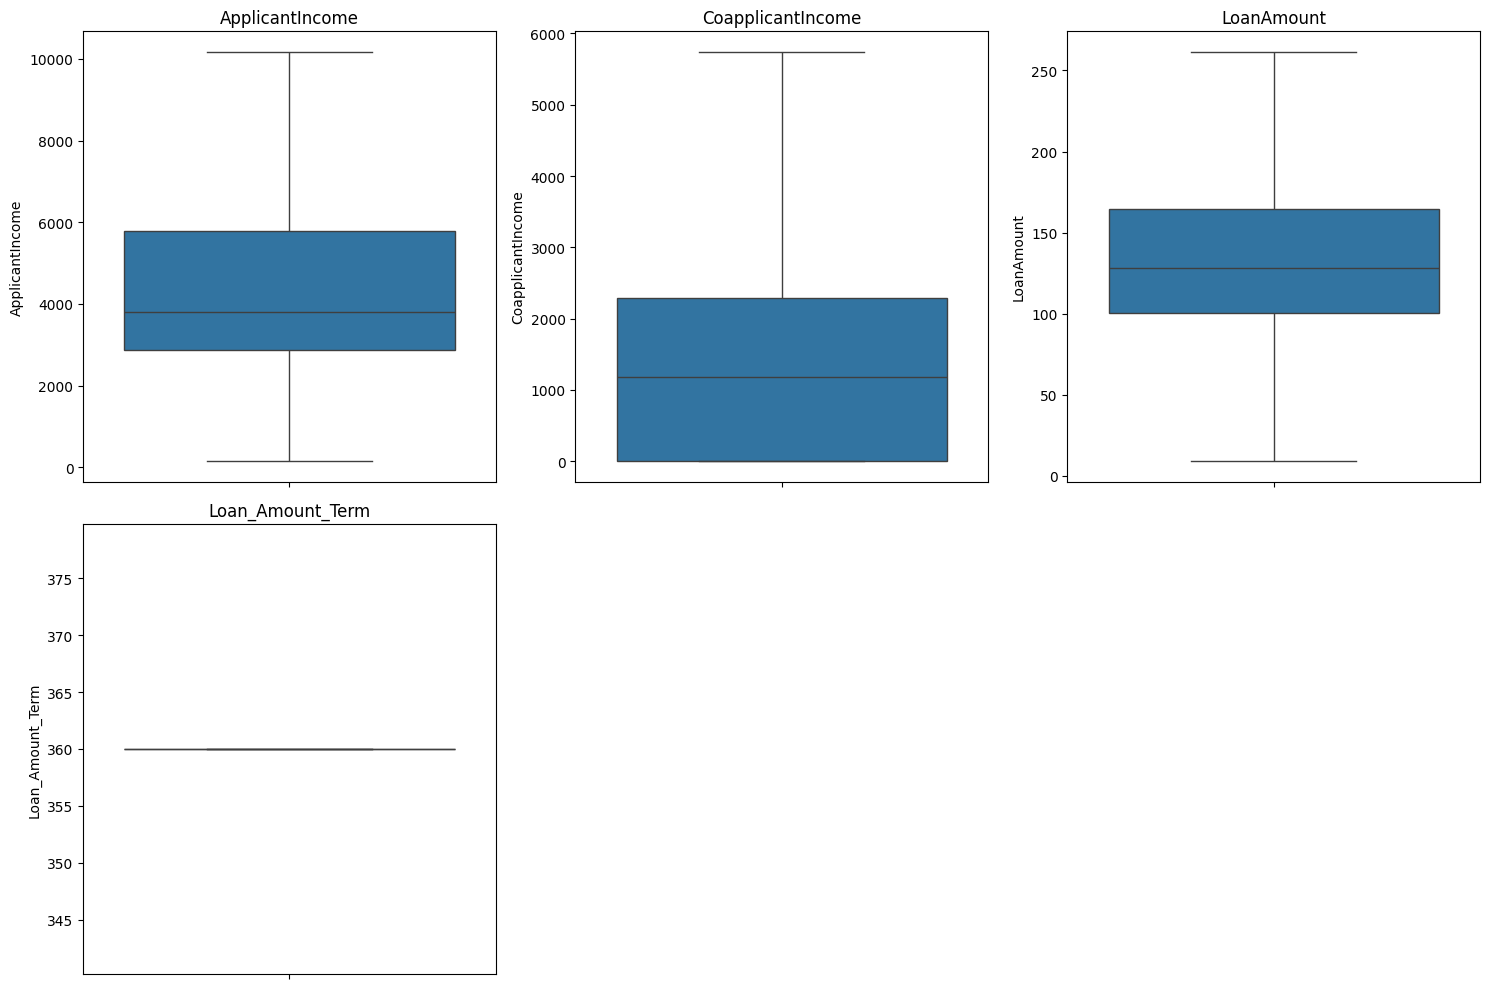

Number of outliers in ApplicantIncome: 0
Number of outliers in CoapplicantIncome: 0
Number of outliers in LoanAmount: 0
Number of outliers in Loan_Amount_Term: 0


In [62]:
# Select numerical columns (excluding 'Credit_History')
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
numerical_columns = numerical_columns.drop('Credit_History')  # Exclude Credit_History

# Plot boxplots for numerical columns to detect outliers
plt.figure(figsize=(15, 10))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(y=df[column])
    plt.title(column)
plt.tight_layout()
plt.show()

# Use IQR to detect outliers
for column in numerical_columns:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    print(f"Number of outliers in {column}: {len(outliers)}")

### Encoding Categorical Variables

In [63]:
pd.set_option('future.no_silent_downcasting', True)

df_encoded = df.replace({
    'Gender': {'Male': 1, 'Female': 0},
    'Married': {'Yes': 1, 'No': 0},
    'Dependents': {'0': 0, '1': 1, '2': 2, '3+': 3},
    'Education': {'Graduate': 1, 'Not Graduate': 0},
    'Self_Employed': {'Yes': 1, 'No': 0},
    'Loan_Status': {'Y': 1, 'N': 0}
})

# Ensure correct data types
df_encoded = df_encoded.astype({
    'Gender': 'int64',
    'Married': 'int64',
    'Dependents': 'int64',
    'Education': 'int64',
    'Self_Employed': 'int64',
    'Loan_Status': 'int64'
})

print(df_encoded.head())

   Gender  Married  Dependents  Education  Self_Employed  ApplicantIncome  \
0       1        0           0          1              0           5849.0   
1       1        1           1          1              0           4583.0   
2       1        1           0          1              1           3000.0   
3       1        1           0          0              0           2583.0   
4       1        0           0          1              0           6000.0   

   CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_History  \
0                0.0       128.0             360.0             1.0   
1             1508.0       128.0             360.0             1.0   
2                0.0        66.0             360.0             1.0   
3             2358.0       120.0             360.0             1.0   
4                0.0       141.0             360.0             1.0   

  Property_Area  Loan_Status  
0         Urban            1  
1         Rural            0  
2         Urban        

### Balance the Target Variable

In [64]:
# Define features (X) and target variable (y)
X = df_encoded.drop(columns=['Loan_Status'])  # Features
y = df_encoded['Loan_Status']  # Target variable

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# One-hot encode the 'Property_Area' column in both X_train and X_test
X_train = pd.get_dummies(X_train, columns=['Property_Area'], drop_first=True)
X_test = pd.get_dummies(X_test, columns=['Property_Area'], drop_first=True)

# Ensure X_test has the same columns as X_train (in case some categories are missing)
X_test = X_test.reindex(columns=X_train.columns, fill_value=0)

# Apply SMOTE only to the training data
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

# Check the distribution of the balanced target variable
print("Balanced target variable distribution in training set:\n", 
      pd.Series(y_train_balanced).value_counts(normalize=True) * 100)

Balanced target variable distribution in training set:
 Loan_Status
0    50.0
1    50.0
Name: proportion, dtype: float64


### Correlation Matrix

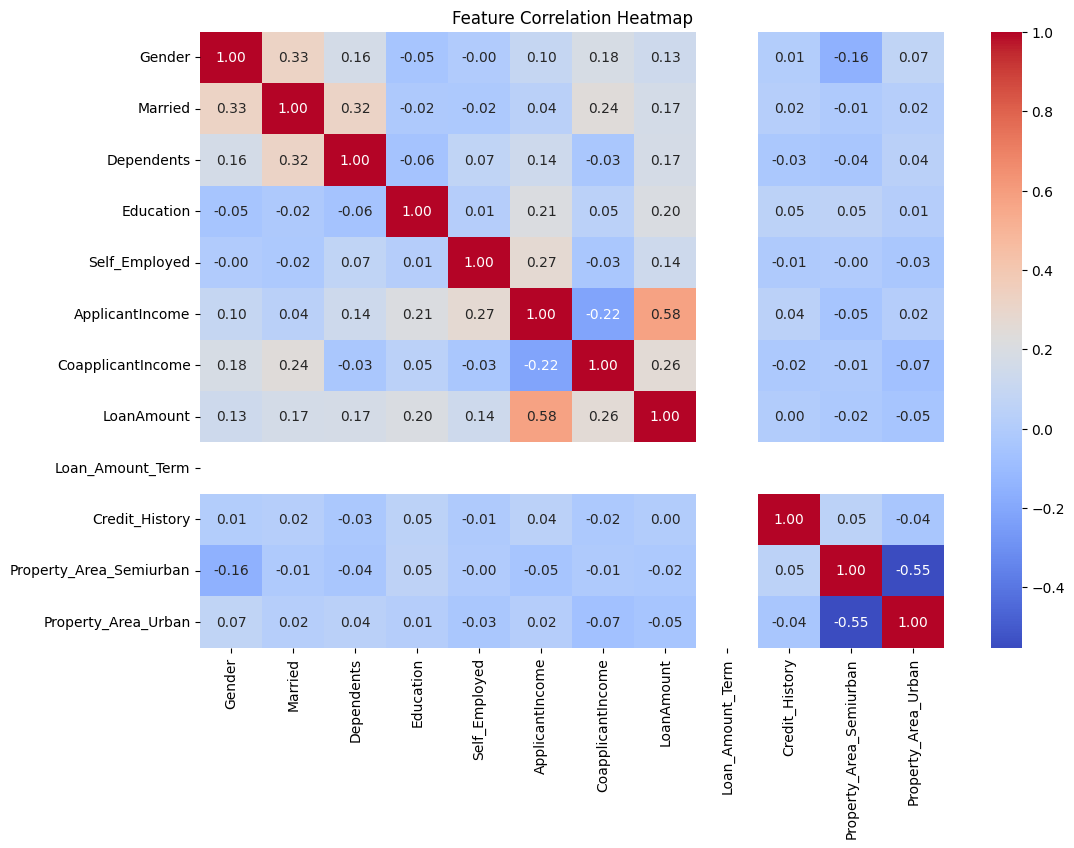

In [66]:
# Calculate the correlation matrix
corr_matrix = X_train.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Feature Correlation Heatmap")
plt.show()

In [ ]:
ApplicantIncome and LoanAmount are moderately correlated (0.58). Including both might lead to redundant splits in the Decision Tree.
Instead of dropping correlated features, consider we will create a new features that capture their relationship

In [68]:
# Create Income-to-Loan Ratio
df['Income_to_Loan_Ratio'] = df['ApplicantIncome'] / (df['LoanAmount'] + 1)  # Add 1 to avoid division by zero

# Drop one of the correlated features
df.drop(columns=['ApplicantIncome'], inplace=True)

## *Model Building and Evaluation*

### Why Use a Decision Tree?  

Decision Trees are an excellent choice for this project because: 

    Interpretability : Decision Trees provide a clear and interpretable model structure. You can visualize the tree to understand how decisions are made.
    Handles Mixed Data Types : Decision Trees can handle both numerical and categorical data without requiring extensive preprocessing (e.g., scaling).
    Non-Parametric : They do not assume any specific distribution of the data, making them flexible for various datasets.
    Feature Importance : Decision Trees allow you to identify the most important features contributing to loan eligibility predictions.
    Baseline Model : Decision Trees serve as a good baseline model before exploring more complex algorithms like Random Forest or Gradient Boosting.
     

In this section, we will: 

    Train a Decision Tree Classifier on the balanced training data.
    Evaluate its performance on the test set.
    Visualize the Decision Tree to interpret the results.
     

### Train a Decision Tree Classifier

In [69]:
# Initialize the Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)

# Train the model on the balanced training data
dt_model.fit(X_train_balanced, y_train_balanced)

DecisionTreeClassifier(random_state=42)

### Evaluate the Model

In [70]:
# Make predictions on the test set
y_pred = dt_model.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the results
print("Decision Tree Model Evaluation Metrics:")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Decision Tree Model Evaluation Metrics:
Accuracy: 0.73
Precision: 0.77
Recall: 0.84
F1-Score: 0.80

Confusion Matrix:
[[23 20]
 [13 67]]

Classification Report:
              precision    recall  f1-score   support

           0       0.64      0.53      0.58        43
           1       0.77      0.84      0.80        80

    accuracy                           0.73       123
   macro avg       0.70      0.69      0.69       123
weighted avg       0.72      0.73      0.73       123



### Visualize the Decision Tree

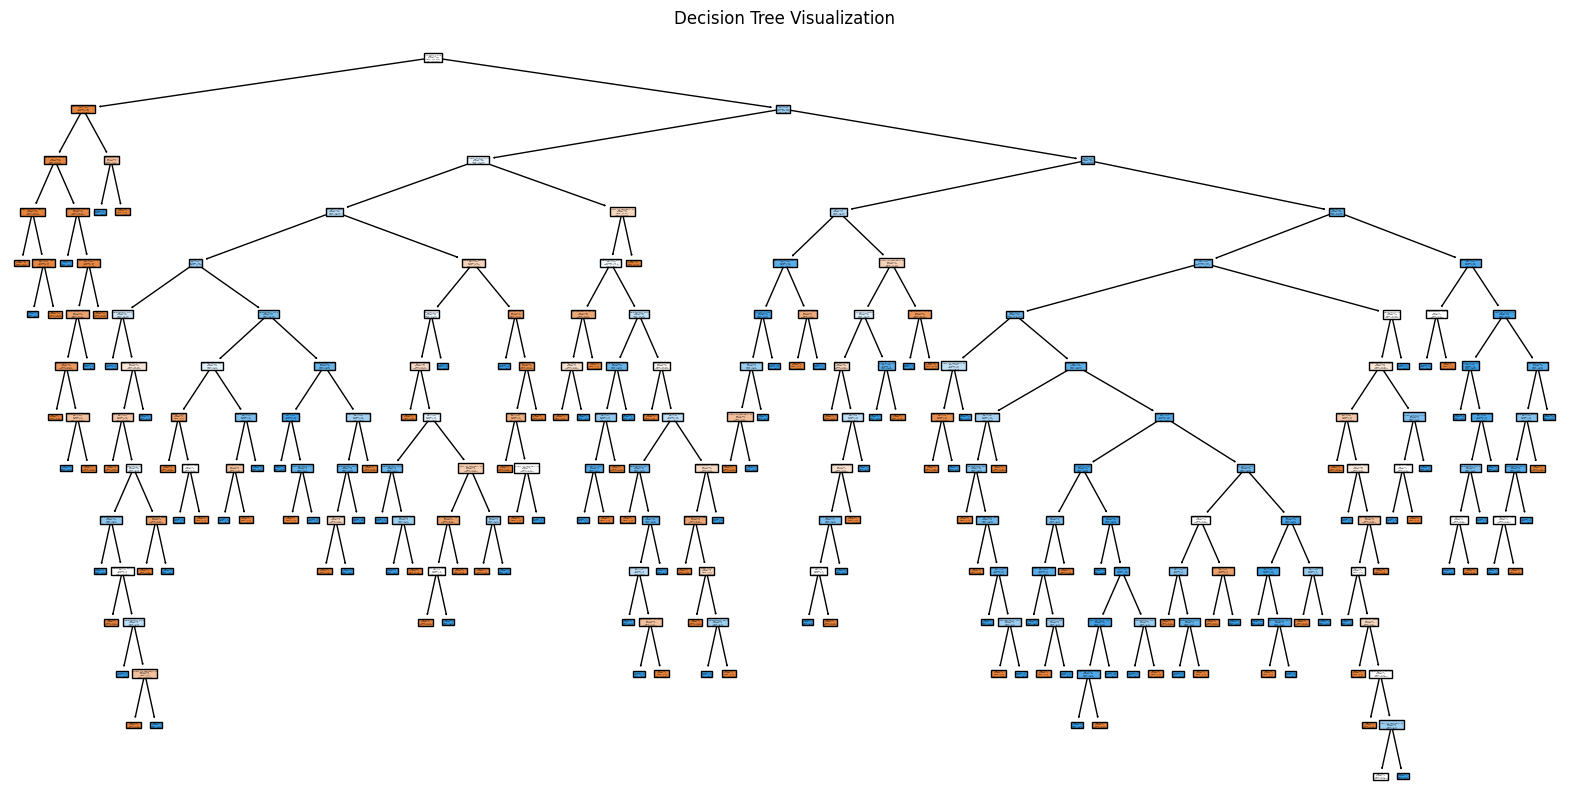

In [71]:
# Plot the Decision Tree
plt.figure(figsize=(20, 10))
plot_tree(dt_model, feature_names=X_train_balanced.columns, class_names=['Not Eligible', 'Eligible'], filled=True)
plt.title("Decision Tree Visualization")
plt.show()

### Analyze Feature Importance

Feature Importance:
                    Feature  Importance
9            Credit_History    0.319871
5           ApplicantIncome    0.205561
7                LoanAmount    0.153822
6         CoapplicantIncome    0.120509
10  Property_Area_Semiurban    0.068911
1                   Married    0.038332
2                Dependents    0.031215
3                 Education    0.024457
11      Property_Area_Urban    0.014968
0                    Gender    0.013723
4             Self_Employed    0.008631
8          Loan_Amount_Term    0.000000


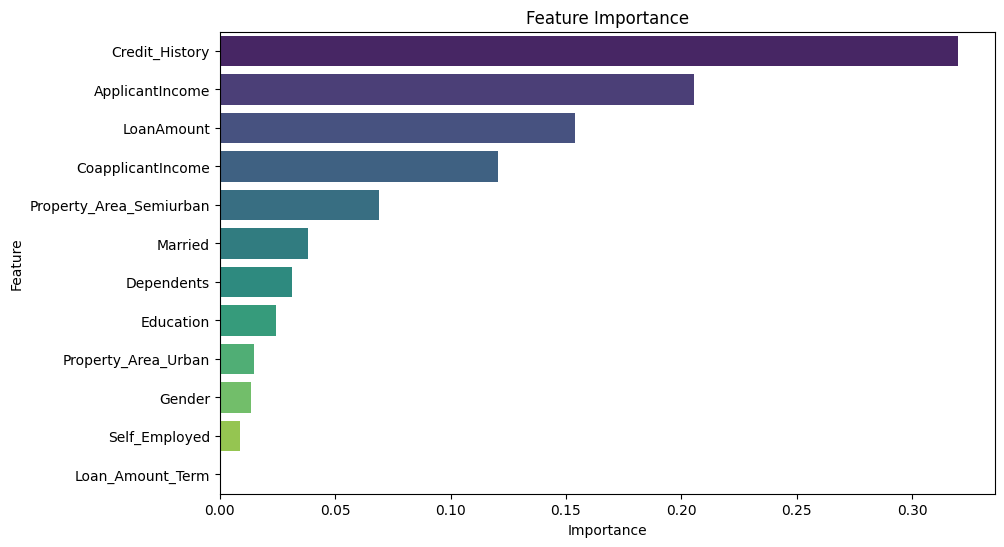

In [73]:
# Extract feature importance
feature_importance = pd.DataFrame({
    'Feature': X_train_balanced.columns,
    'Importance': dt_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

# Display feature importance
print("Feature Importance:")
print(feature_importance)

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', hue='Feature', data=feature_importance, palette='viridis', legend=False)
plt.title("Feature Importance")
plt.show()

## Optimize the Decision Tree

In [74]:
# Define the parameter grid
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Perform Grid Search with Cross-Validation
grid_search = GridSearchCV(
    estimator=DecisionTreeClassifier(random_state=42),
    param_grid=param_grid,
    cv=5,
    scoring='f1',
    n_jobs=-1
)

# Fit the Grid Search to the balanced training data
grid_search.fit(X_train_balanced, y_train_balanced)

# Get the best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best F1-Score:", grid_search.best_score_)

# Train the optimized Decision Tree model
optimized_dt_model = grid_search.best_estimator_
optimized_dt_model.fit(X_train_balanced, y_train_balanced)

Best Parameters: {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 2}
Best F1-Score: 0.7900839912760026


DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=4,
                       random_state=42)

## Remove Irrelevant Features

In [75]:
# Drop irrelevant features
df.drop(columns=['Gender', 'Self_Employed', 'Loan_Amount_Term'], inplace=True)

# Verify the updated dataset
print("Columns after removing irrelevant features:\n", df.columns)

Columns after removing irrelevant features:
 Index(['Married', 'Dependents', 'Education', 'CoapplicantIncome', 'LoanAmount',
       'Credit_History', 'Property_Area', 'Loan_Status',
       'Income_to_Loan_Ratio'],
      dtype='object')


In [76]:
# Ensure encoding for categorical variables
df_encoded = df.replace({
    'Married': {'Yes': 1, 'No': 0},
    'Dependents': {'0': 0, '1': 1, '2': 2, '3+': 3},
    'Education': {'Graduate': 1, 'Not Graduate': 0},
    'Loan_Status': {'Y': 1, 'N': 0}
})

# Ensure correct data types
df_encoded = df_encoded.astype({
    'Married': 'int64',
    'Dependents': 'int64',
    'Education': 'int64',
    'Loan_Status': 'int64'
})

print(df_encoded.head())

   Married  Dependents  Education  CoapplicantIncome  LoanAmount  \
0        0           0          1                0.0       128.0   
1        1           1          1             1508.0       128.0   
2        1           0          1                0.0        66.0   
3        1           0          0             2358.0       120.0   
4        0           0          1                0.0       141.0   

   Credit_History Property_Area  Loan_Status  Income_to_Loan_Ratio  
0             1.0         Urban            1             45.341085  
1             1.0         Rural            0             35.527132  
2             1.0         Urban            1             44.776119  
3             1.0         Urban            1             21.347107  
4             1.0         Urban            1             42.253521  


In [77]:
# Define features (X) and target variable (y)
X = df_encoded.drop(columns=['Loan_Status'])  # Features
y = df_encoded['Loan_Status']  # Target variable

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# One-hot encode the 'Property_Area' column in both X_train and X_test
X_train = pd.get_dummies(X_train, columns=['Property_Area'], drop_first=True)
X_test = pd.get_dummies(X_test, columns=['Property_Area'], drop_first=True)

# Ensure X_test has the same columns as X_train (in case some categories are missing)
X_test = X_test.reindex(columns=X_train.columns, fill_value=0)

# Apply SMOTE only to the training data
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

In [78]:
# Initialize the Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)

# Train the model on the balanced training data
dt_model.fit(X_train_balanced, y_train_balanced)

DecisionTreeClassifier(random_state=42)

In [79]:
# Make predictions on the test set
y_pred = dt_model.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the results
print("Decision Tree Model Evaluation Metrics After Removing Irrelevant Features:")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Decision Tree Model Evaluation Metrics After Removing Irrelevant Features:
Accuracy: 0.74
Precision: 0.79
Recall: 0.82
F1-Score: 0.80

Confusion Matrix:
[[25 18]
 [14 66]]

Classification Report:
              precision    recall  f1-score   support

           0       0.64      0.58      0.61        43
           1       0.79      0.82      0.80        80

    accuracy                           0.74       123
   macro avg       0.71      0.70      0.71       123
weighted avg       0.74      0.74      0.74       123



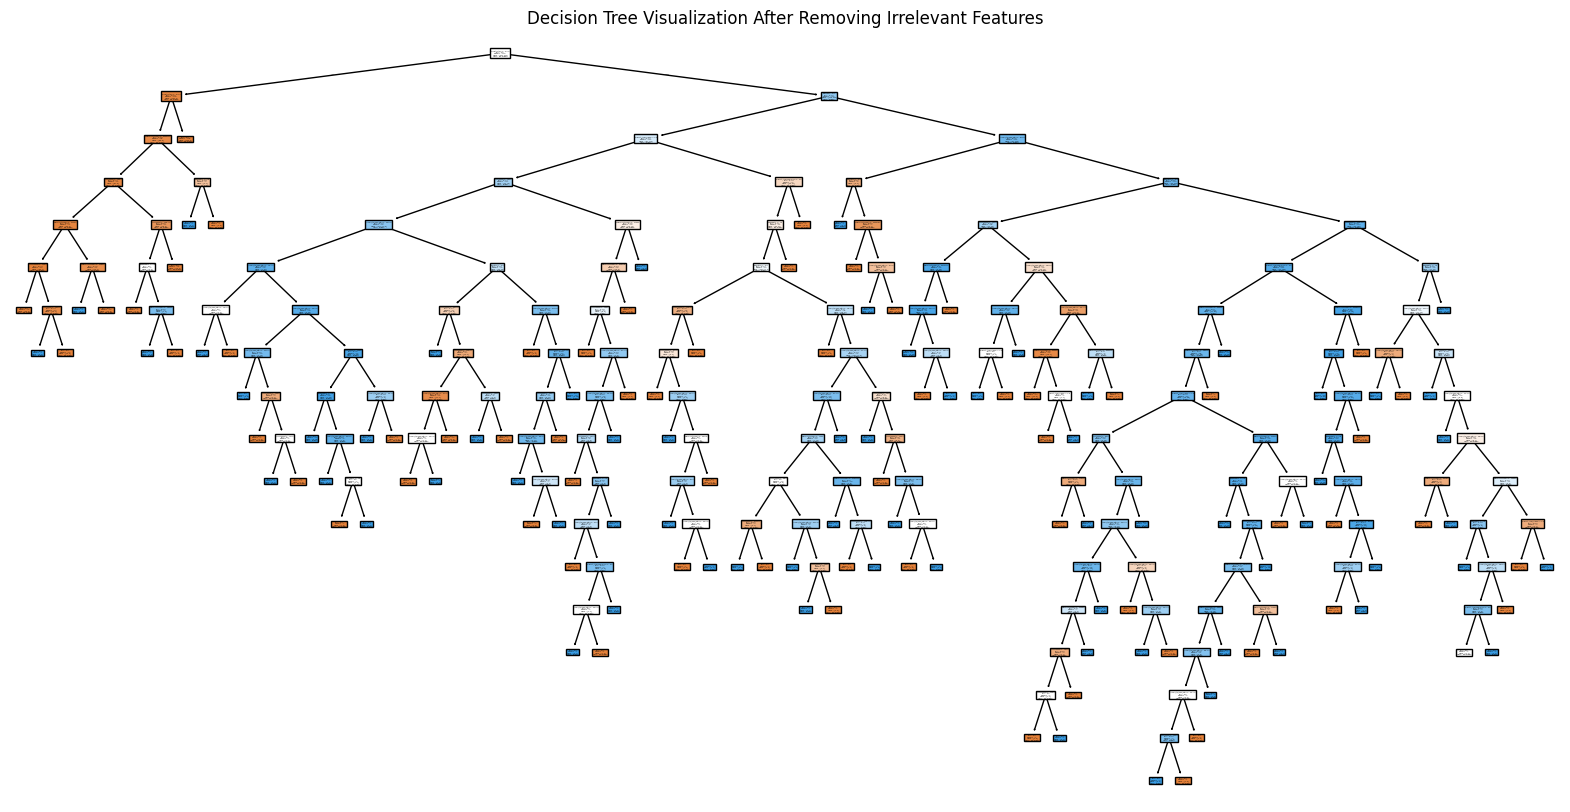

In [80]:
# Plot the Decision Tree
plt.figure(figsize=(20, 10))
plot_tree(dt_model, feature_names=X_train_balanced.columns, class_names=['Not Eligible', 'Eligible'], filled=True)
plt.title("Decision Tree Visualization After Removing Irrelevant Features")
plt.show()

In [81]:
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(
    estimator=DecisionTreeClassifier(random_state=42),
    param_grid=param_grid,
    cv=5,
    scoring='f1',
    n_jobs=-1
)

grid_search.fit(X_train_balanced, y_train_balanced)
print("Best Parameters:", grid_search.best_params_)
print("Best F1-Score:", grid_search.best_score_)

Best Parameters: {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 2, 'min_samples_split': 2}
Best F1-Score: 0.8162952145893323


## *Conclusion*

The Decision Tree model achieved an accuracy of **74%**, precision of **79%**, recall of **82%**, and F1-score of **80%**. After hyperparameter tuning, the best F1-score improved to **81.6%**, demonstrating the effectiveness of optimization techniques.

While the Decision Tree model performed well, there are opportunities for further improvement:
- **Experiment with Ensemble Methods**: Algorithms like Random Forest or Gradient Boosting could potentially outperform a single Decision Tree by reducing variance and improving generalization.
- **Threshold Tuning**: Adjusting the decision threshold could help prioritize recall for ineligible applicants, ensuring that fewer risky loans are approved.
- **Additional Data**: Incorporating more features (e.g., employment history, credit score details) or external datasets could enhance the model's predictive power.